# Fig 5 


## Load the data to replicate the results from experiment


In [1]:
setwd("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig5-data")
data_HP_1 <-read.csv("output_lp_HP_State0_0.csv", header = FALSE)
HP_0.1 <- data_HP_1[1:60,]

data_HP_2 <-read.csv("output_lp_HP_State0_2.csv", header = FALSE)
HP_0.5 <- data_HP_2[1:60,]

data_HP_3 <-read.csv("output_lp_HP_State0_4.csv", header = FALSE)
HP_0.9 <- data_HP_3[1:60,]

data_HP_WT <-read.csv("output_lp_HP_State0_5.csv", header = FALSE)
WT <- data_HP_WT[1:60,]

In [2]:
library(ggplot2)
p <- ggplot(WT, aes(WT$V1), legend="EpithelialCellproliferation") + 
  geom_line(aes(y=WT$V2, color=".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=HP_0.1$V2, color="0.1"),size=1) + 
  geom_ribbon(aes(ymin=HP_0.1$V2-HP_0.1$V3/sqrt(60),
                  ymax=HP_0.1$V2+HP_0.1$V3/sqrt(60)), 
              alpha=0.6, fill="red") +
  geom_line(aes(y=HP_0.5$V2, color="0.5") ,size=1) + 
  geom_ribbon(aes(ymin=HP_0.5$V2-HP_0.5$V3/sqrt(60),
                  ymax=HP_0.5$V2+HP_0.5$V3/sqrt(60)), 
               alpha=0.6, fill = "blue")+
  geom_line(aes(y=HP_0.9$V2, color="0.9"), size=1) + 
  geom_ribbon(aes(ymin=HP_0.9$V2-HP_0.9$V3/sqrt(60),
                  ymax=HP_0.9$V2+HP_0.9$V3/sqrt(60)), 
               alpha=0.6, fill = "green") +
scale_colour_manual(name="EpithelialCellproliferation", values=c(".WT"="black","0.1"="red","0.5"="blue","0.9"="green"))



Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”

## Modifying attributes of the ggplot

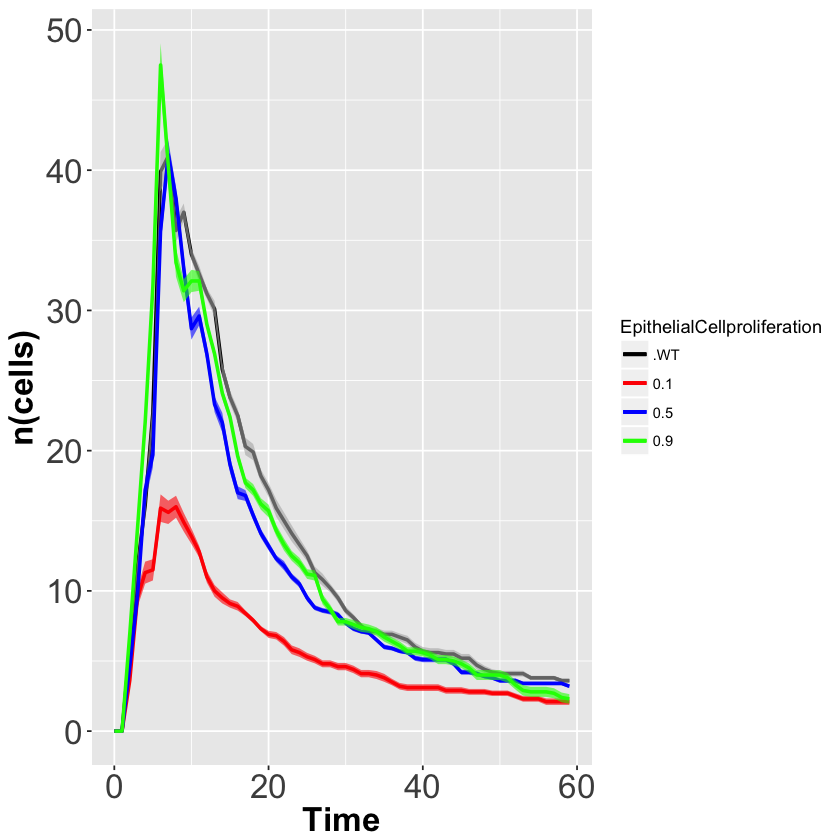

In [3]:
p + labs(x = "Time", y = "n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))


## Stats

In [4]:
data1 <- WT[1:60,]
data2 <- HP_0.1[1:60,]
data3 <- HP_0.5[1:60,]
data4 <- HP_0.9[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("HP_0.1", length), rep.int("HP_0.5", length), rep.int("HP_0.9", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))


             Df Sum Sq Mean Sq F value   Pr(>F)    
df$params     3   1813   604.3   6.891 0.000182 ***
Residuals   236  20697    87.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                    diff        lwr       upr     p adj
HP_0.1-.WT    -6.9433333 -11.367197 -2.519470 0.0003851
HP_0.5-.WT    -1.7000000  -6.123863  2.723863 0.7528181
HP_0.9-.WT    -0.5666667  -4.990530  3.857197 0.9874156
HP_0.5-HP_0.1  5.2433333   0.819470  9.667197 0.0128323
HP_0.9-HP_0.1  6.3766667   1.952803 10.800530 0.0013649
HP_0.9-HP_0.5  1.1333333  -3.290530  5.557197 0.9109071



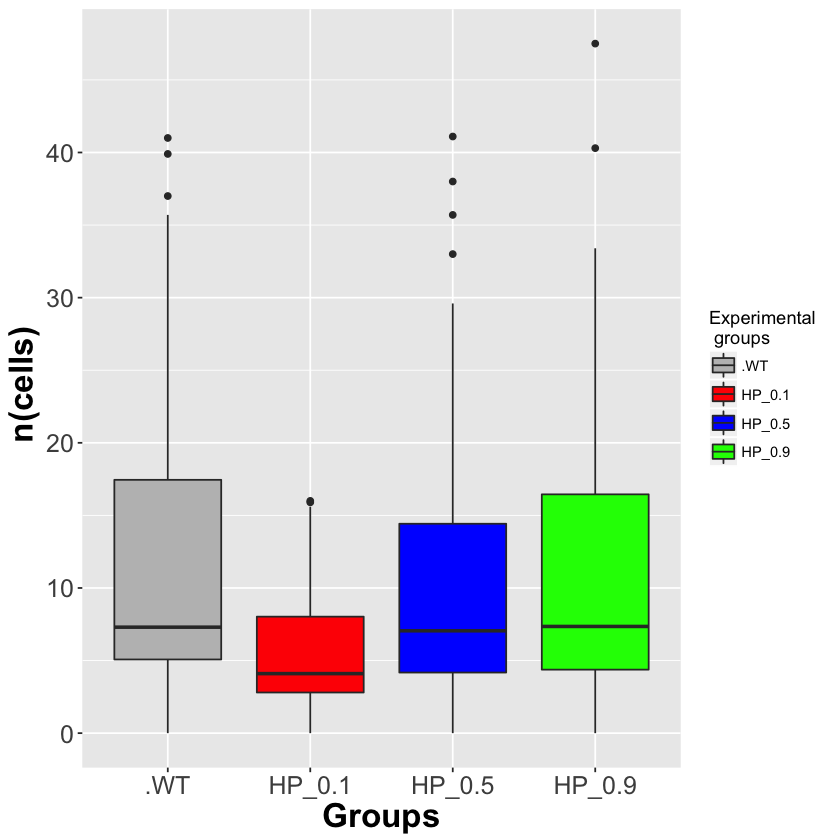

In [5]:
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental \n groups", values=c("grey","red","blue","green"))
s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

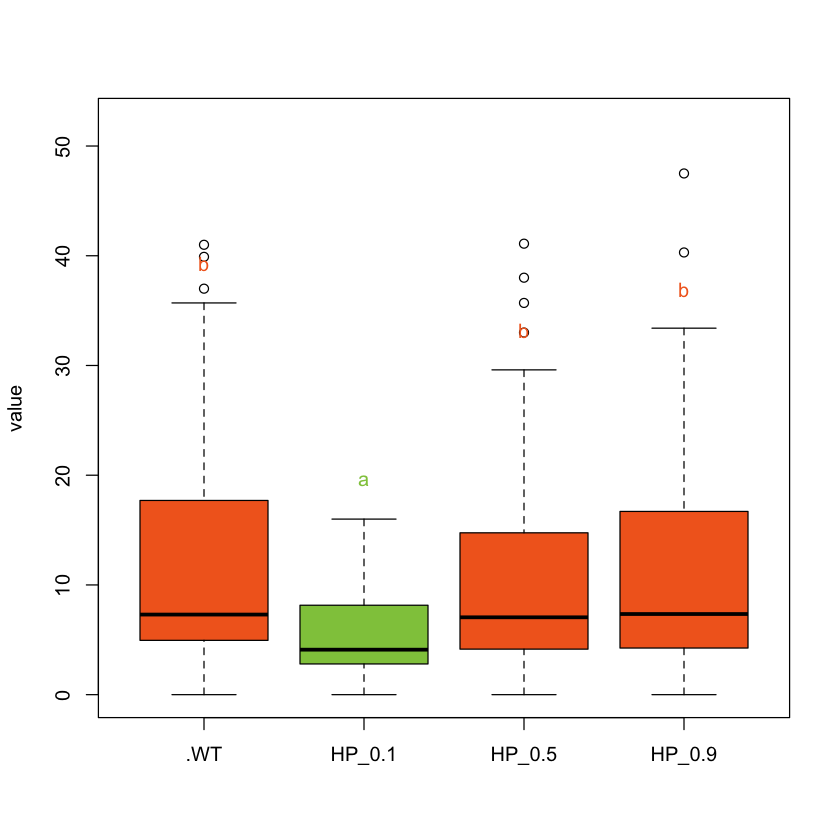

In [7]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

#plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)
generate_label_df <- function(TUKEY, variable){
  
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])

  ## value -> data; treatment -> params
  
  #I need to put the labels in the same order as in the boxplot :
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))

a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="value" , main="")

# Lets you write the letter over each box. Over is how high you want to write it.
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#


## Saving plot in pdf
### Uncomment the below lines to save as pdf

In [8]:
#library(gplots)
#pdf(paste0("LP_HP.pdf"), 7, 5)
#p + labs(x = "Ticks", y = "# of agents") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

In [10]:
data_tDC_1 <-read.csv("output_gln_Dendritics_state2_0.csv", header = FALSE)
tDC_0.1 <- data_tDC_1[1:60,]

data_tDC_2 <-read.csv("output_gln_Dendritics_state2_2.csv", header = FALSE)
tDC_0.5 <- data_tDC_2[1:60,]

data_tDC_3 <-read.csv("output_gln_Dendritics_state2_4.csv", header = FALSE)
tDC_0.9 <- data_tDC_3[1:60,]

data_tDC_WT <-read.csv("output_gln_Dendritics_state2_5.csv", header = FALSE)
WT <- data_tDC_WT[1:60,]



In [11]:
p <- ggplot(WT, aes(WT$V1), legend="EpithelialCellproliferation") + 
  geom_line(aes(y=WT$V2, color=".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=tDC_0.1$V2, color="0.1"),size=1) + 
  geom_ribbon(aes(ymin=tDC_0.1$V2-tDC_0.1$V3/sqrt(60),
                  ymax=tDC_0.1$V2+tDC_0.1$V3/sqrt(60)), 
              alpha=0.6, fill="red") +
  geom_line(aes(y=tDC_0.5$V2, color="0.5") ,size=1) + 
  geom_ribbon(aes(ymin=tDC_0.5$V2-tDC_0.5$V3/sqrt(60),
                  ymax=tDC_0.5$V2+tDC_0.5$V3/sqrt(60)), 
               alpha=0.6, fill = "blue")+
  geom_line(aes(y=tDC_0.9$V2, color="0.9"), size=1) + 
  geom_ribbon(aes(ymin=tDC_0.9$V2-tDC_0.9$V3/sqrt(60),
                  ymax=tDC_0.9$V2+tDC_0.9$V3/sqrt(60)), 
               alpha=0.6, fill = "green") +
scale_colour_manual(name="EpithelialCellproliferation", values=c(".WT"="black","0.1"="red","0.5"="blue","0.9"="green"))


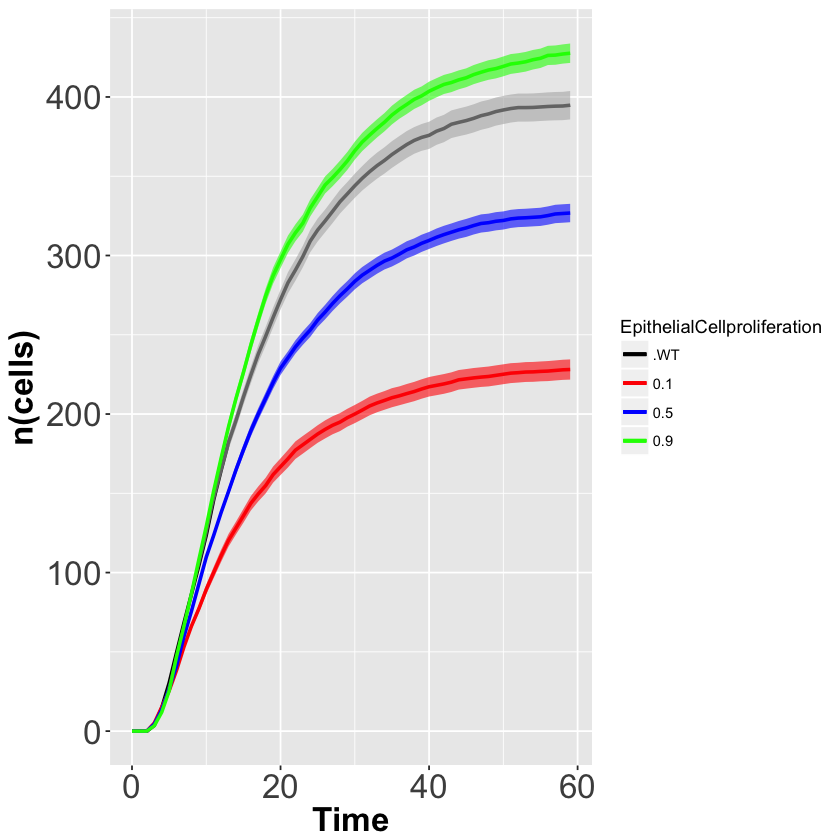

In [14]:
p + labs(x = "Time", y = "n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))


## Saving plot in pdf
### Uncomment the below lines to save as pdf

In [ ]:
#library(gplots)
#pdf(paste0("GLN_tDC-Nov118.pdf"), 7, 5)
#p + labs(x = "Ticks", y = "# of agents") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

In [15]:
data1 <- WT[1:60,]
data2 <- tDC_0.1[1:60,]
data3 <- tDC_0.5[1:60,]
data4 <- tDC_0.9[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("tDC_0.1", length), rep.int("tDC_0.5", length), rep.int("tDC_0.9", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))


             Df  Sum Sq Mean Sq F value   Pr(>F)    
df$params     3  638968  212989   15.84 2.04e-09 ***
Residuals   236 3173436   13447                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                      diff        lwr        upr     p adj
tDC_0.1-.WT     -114.08500 -168.86433 -59.305671 0.0000010
tDC_0.5-.WT      -48.36167 -103.14100   6.417662 0.1046117
tDC_0.9-.WT       19.71167  -35.06766  74.490996 0.7882125
tDC_0.5-tDC_0.1   65.72333   10.94400 120.502662 0.0114228
tDC_0.9-tDC_0.1  133.79667   79.01734 188.575996 0.0000000
tDC_0.9-tDC_0.5   68.07333   13.29400 122.852662 0.0080413



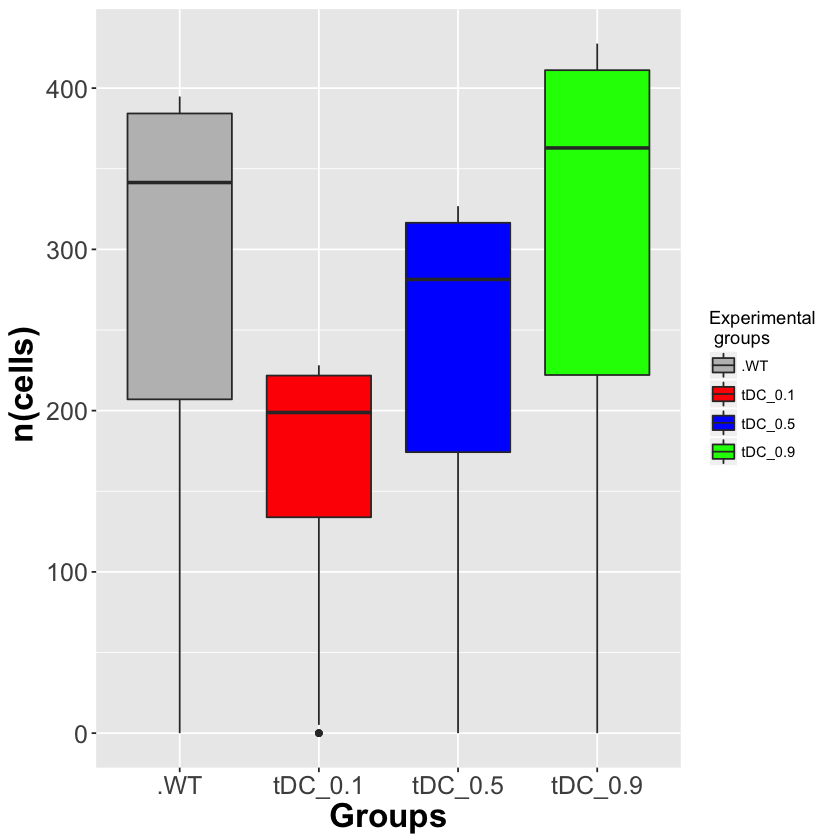

In [16]:
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental \n groups", values=c("grey","red","blue", "green"))
s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

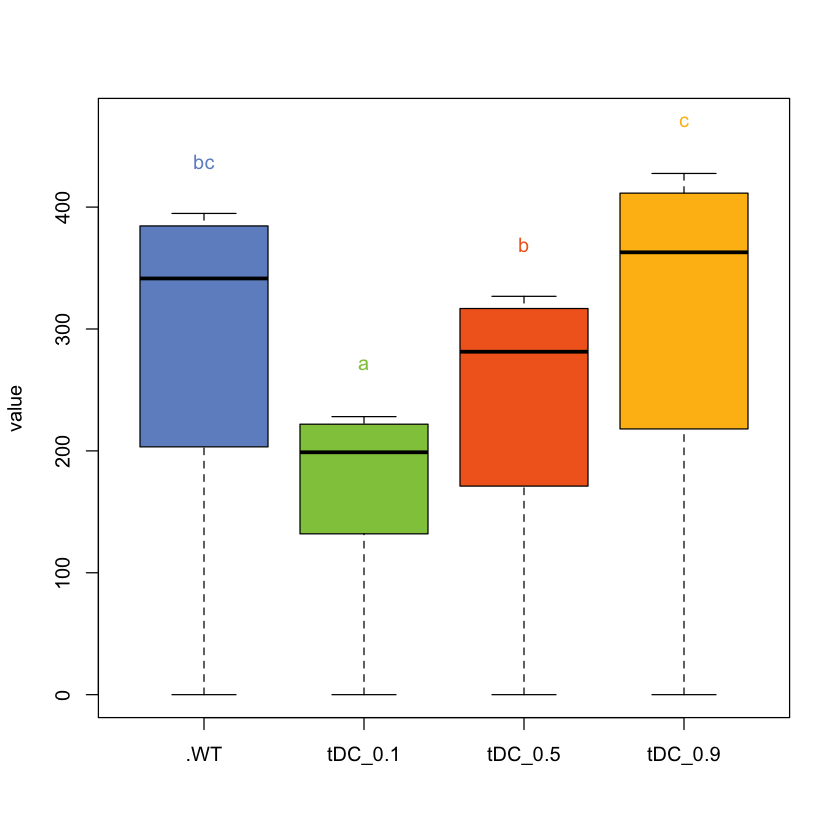

In [17]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

#plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)
# I need to group the treatments that are not different each other together.
generate_label_df <- function(TUKEY, variable){
  
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])

  ## value -> data; treatment -> params
  
  #I need to put the labels in the same order as in the boxplot :
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

#value <- data_f
treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))

a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="value" , main="")

# Lets you write the letter over each box. Over is how high you want to write it.
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#


In [24]:
data_Mreg_0.1 <-read.csv("output_lp_Macrophage_State2_0.csv", header = FALSE)
Mreg_0.1 <- data_Mreg_0.1[1:60,]

data_Mreg_0.5 <-read.csv("output_lp_Macrophage_State2_2.csv", header = FALSE)
Mreg_0.5 <- data_Mreg_0.5[1:60,]

data_Mreg_0.9 <-read.csv("output_lp_Macrophage_State2_4.csv", header = FALSE)
Mreg_0.9 <- data_Mreg_0.9[1:60,]

data_Mreg_WT <-read.csv("output_lp_Macrophage_State2_5.csv", header = FALSE)
WT <- data_Mreg_WT[1:60,]

In [25]:
p <- ggplot(WT, aes(WT$V1), legend="EpithelialCellproliferation") + 
  geom_line(aes(y=WT$V2, color = ".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=Mreg_0.1$V2, color = "0.1"), size=1) + 
  geom_ribbon(aes(ymin=Mreg_0.1$V2-Mreg_0.1$V3/sqrt(60),
                  ymax=Mreg_0.1$V2+Mreg_0.1$V3/sqrt(60)), 
              alpha=0.6, fill="red") +
  geom_line(aes(y=Mreg_0.5$V2, color = "0.5"), size=1) + 
  geom_ribbon(aes(ymin=Mreg_0.5$V2-Mreg_0.5$V3/sqrt(60),
                  ymax=Mreg_0.5$V2+Mreg_0.5$V3/sqrt(60)), 
               alpha=0.6, fill = "blue")+
  geom_line(aes(y=Mreg_0.9$V2, color = "0.9"), size=1) + 
  geom_ribbon(aes(ymin=Mreg_0.9$V2-Mreg_0.9$V3/sqrt(60),
                  ymax=Mreg_0.9$V2+Mreg_0.9$V3/sqrt(60)), 
               alpha=0.6, fill = "green")+
scale_colour_manual(name="EpithelialCellproliferation", values=c(".WT"="black","0.1"="red","0.5"="blue","0.9"="green"))



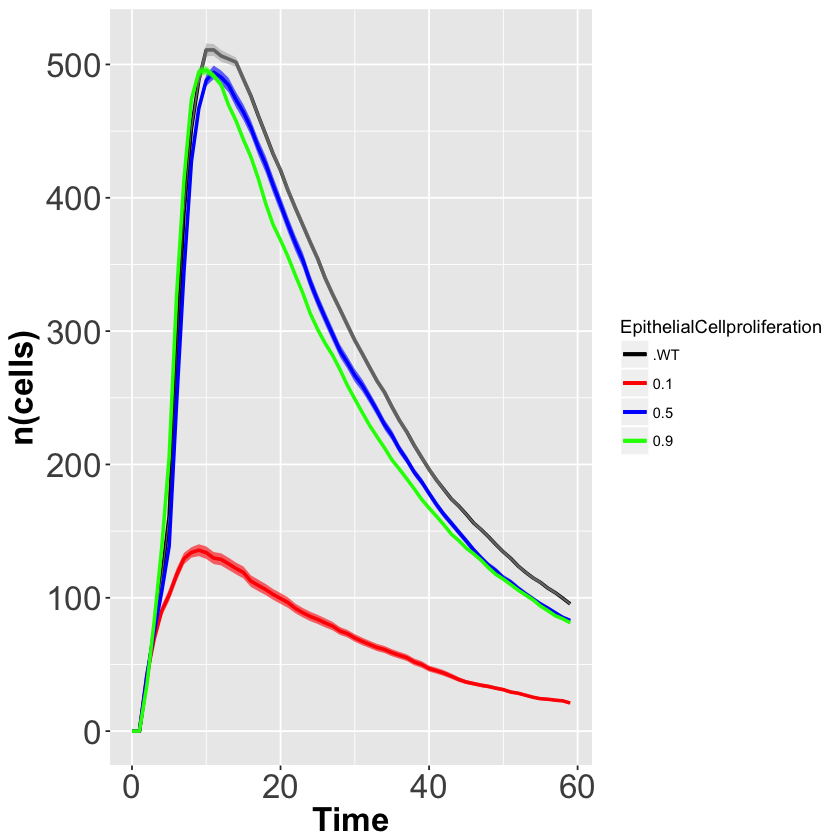

In [26]:
p + labs(x = "Time", y = "n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))



## Saving plot in pdf
### Uncomment the below lines to save as pdf

In [27]:
#library(gplots)
#pdf(paste0("LP_Mreg-Nov118.pdf"), 7, 5)
#p + labs(x = "Time", y = "n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

In [28]:
data1 <- WT[1:60,]
data2 <- Mreg_0.1[1:60,]
data3 <- Mreg_0.5[1:60,]
data4 <- Mreg_0.9[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("Mreg_0.1", length), rep.int("Mreg_0.5", length), rep.int("Mreg_0.9", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))


             Df  Sum Sq Mean Sq F value Pr(>F)    
df$params     3 1456157  485386   30.43 <2e-16 ***
Residuals   236 3764908   15953                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                         diff        lwr        upr     p adj
Mreg_0.1-.WT      -193.848333 -253.51462 -134.18204 0.0000000
Mreg_0.5-.WT       -20.611667  -80.27796   39.05462 0.8080681
Mreg_0.9-.WT       -25.323333  -84.98962   34.34296 0.6910192
Mreg_0.5-Mreg_0.1  173.236667  113.57038  232.90296 0.0000000
Mreg_0.9-Mreg_0.1  168.525000  108.85871  228.19129 0.0000000
Mreg_0.9-Mreg_0.5   -4.711667  -64.37796   54.95462 0.9969748



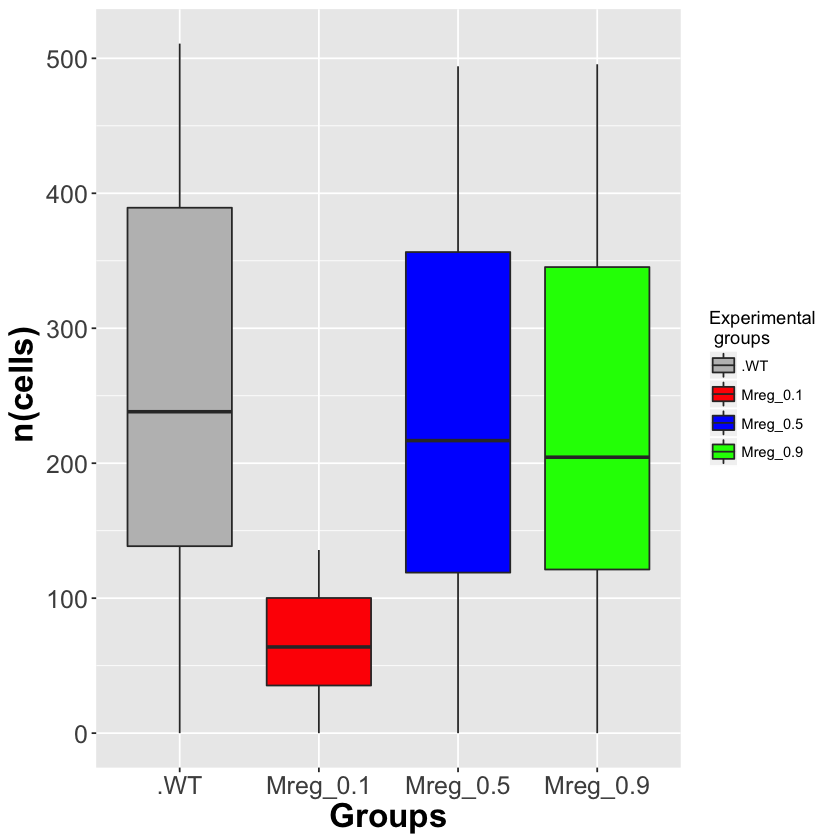

In [29]:
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
#plot(df$data ~ df$params)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental \n groups", values=c("grey","red","blue", "green"))

##### Extra ###
##### Extra ###
#cbind(a = "HP", df)
#write.csv(df, "boxplot_HP.csv")

s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

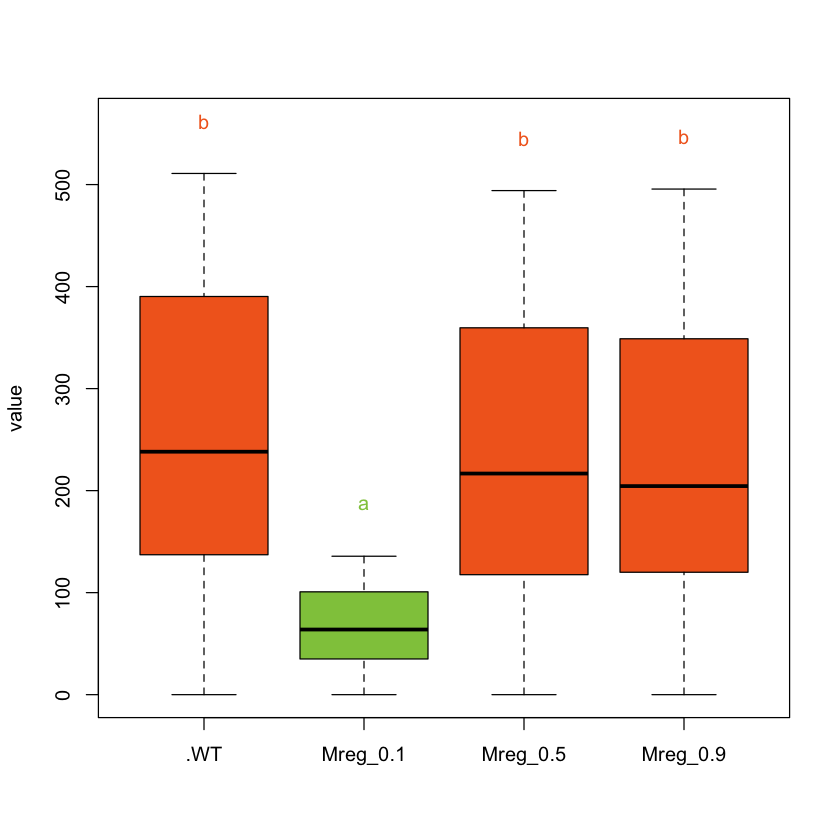

In [30]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

#plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)
# I need to group the treatments that are not different each other together.
generate_label_df <- function(TUKEY, variable){
  
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])

  ## value -> data; treatment -> params
  
  #I need to put the labels in the same order as in the boxplot :
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

#value <- data_f
treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))
a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="value" , main="")

# Lets you write the letter over each box. Over is how high you want to write it.
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#


In [31]:
data_Mres_0.1 <-read.csv("output_lp_Macrophage_State1_0.csv", header = FALSE)
Mres_0.1 <- data_Mres_0.1[1:60,]

data_Mres_0.5 <-read.csv("output_lp_Macrophage_State1_2.csv", header = FALSE)
Mres_0.5 <- data_Mres_0.5[1:60,]

data_Mres_0.9 <-read.csv("output_lp_Macrophage_State1_4.csv", header = FALSE)
Mres_0.9 <- data_Mres_0.9[1:60,]

data_Mres_WT <-read.csv("output_lp_Macrophage_State1_5.csv", header = FALSE)
WT <- data_Mres_WT[1:60,]

In [34]:
p <- ggplot(WT, aes(WT$V1), legend="EpithelialCellproliferation") + 
  geom_line(aes(y=WT$V2, color = ".WT"), size=1) + 
  geom_ribbon(aes(ymin=WT$V2-WT$V3/sqrt(60),
                  ymax=WT$V2+WT$V3/sqrt(60)), 
             alpha=0.6, fill="grey70") +
  geom_line(aes(y=Mres_0.1$V2, color = "0.1"), size=1) + 
  geom_ribbon(aes(ymin=Mres_0.1$V2-Mres_0.1$V3/sqrt(60),
                  ymax=Mres_0.1$V2+Mres_0.1$V3/sqrt(60)), 
              alpha=0.6, fill="red") +
  geom_line(aes(y=Mres_0.5$V2, color = "0.5"), size=1) + 
  geom_ribbon(aes(ymin=Mres_0.5$V2-Mres_0.5$V3/sqrt(60),
                  ymax=Mres_0.5$V2+Mres_0.5$V3/sqrt(60)), 
               alpha=0.6, fill = "blue")+
  geom_line(aes(y=Mres_0.9$V2, , color = "0.9"), size=1) + 
  geom_ribbon(aes(ymin=Mres_0.9$V2-Mres_0.9$V3/sqrt(60),
                  ymax=Mres_0.9$V2+Mres_0.9$V3/sqrt(60)), 
               alpha=0.6, fill = "green")+
scale_colour_manual(name="EpithelialCellproliferation", values=c(".WT"="black","0.1"="red","0.5"="blue","0.9"="green"))



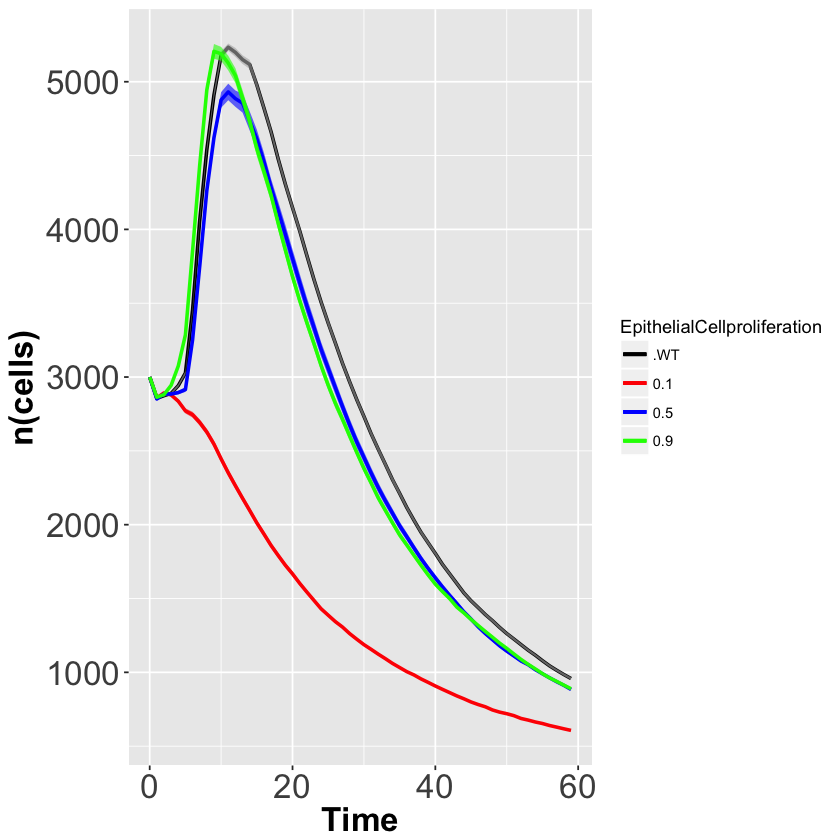

In [35]:
p + labs(x = "Time", y = "n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))



## Saving plot in pdf
### Uncomment the below lines to save as pdf

In [37]:
#library(gplots)
#pdf(paste0("LP_Mres-Nov118.pdf"), 7, 5)
#p + labs(x = "Time", y = "n(cells)") + theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))
#dev.off()

In [38]:
data1 <- WT[1:60,]
data2 <- Mres_0.1[1:60,]
data3 <- Mres_0.5[1:60,]
data4 <- Mres_0.9[1:60,]
data = c(data1["V2"], data2["V2"],data3["V2"], data4["V2"])
data = unlist(data, use.names = FALSE)
length = lengths(data1["V2"])
params = c(rep.int(".WT", length), rep.int("Mres_0.1", length), rep.int("Mres_0.5", length), rep.int("Mres_0.9", length))
df = data.frame(data, params)
results = aov(df$data ~ df$params)
print(summary(results))


             Df    Sum Sq  Mean Sq F value   Pr(>F)    
df$params     3  65848740 21949580   14.79 7.41e-09 ***
Residuals   236 350216045  1483966                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$data ~ df$params)

$`df$params`
                         diff        lwr       upr     p adj
Mres_0.1-.WT      -1322.65500 -1898.1213 -747.1887 0.0000001
Mres_0.5-.WT       -205.27167  -780.7379  370.1946 0.7926013
Mres_0.9-.WT       -174.42000  -749.8863  401.0463 0.8615682
Mres_0.5-Mres_0.1  1117.38333   541.9171 1692.8496 0.0000059
Mres_0.9-Mres_0.1  1148.23500   572.7687 1723.7013 0.0000031
Mres_0.9-Mres_0.5    30.85167  -544.6146  606.3179 0.9990452



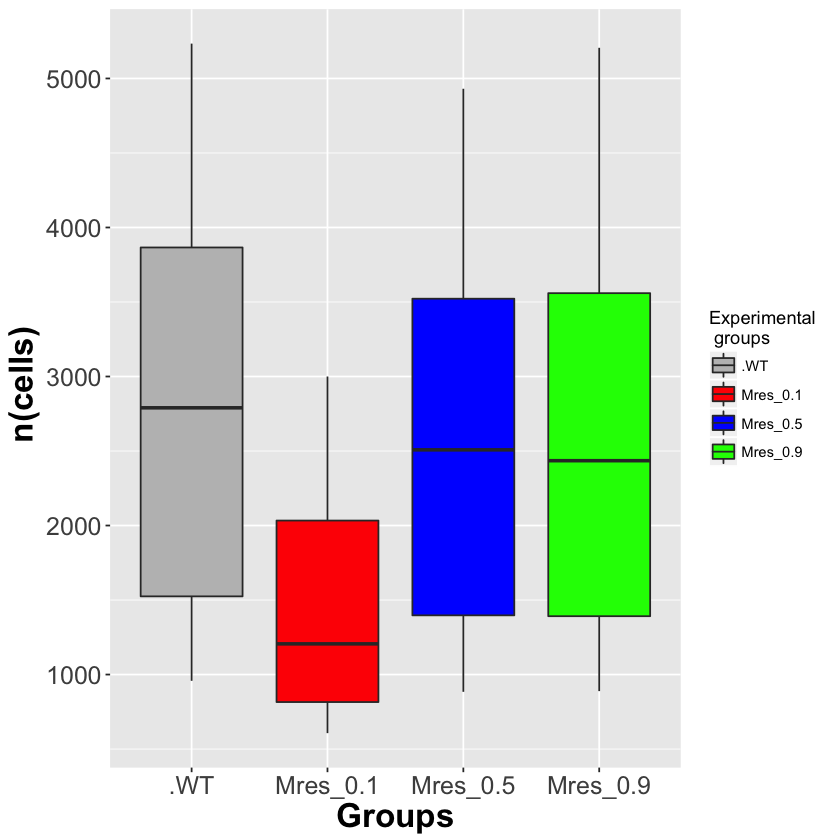

In [39]:
muti_comparison <- TukeyHSD(results)
print(muti_comparison)
#plot(df$data ~ df$params)
s <- ggplot(data = df, aes(x=params, y=data)) + geom_boxplot(aes(fill=params)) + scale_fill_manual(name="Experimental \n groups", values=c("grey","red","blue", "green"))

s + labs(x = "Groups", y = " n(cells)") + theme(axis.text=element_text(size=15), axis.title=element_text(size=20,face="bold"))

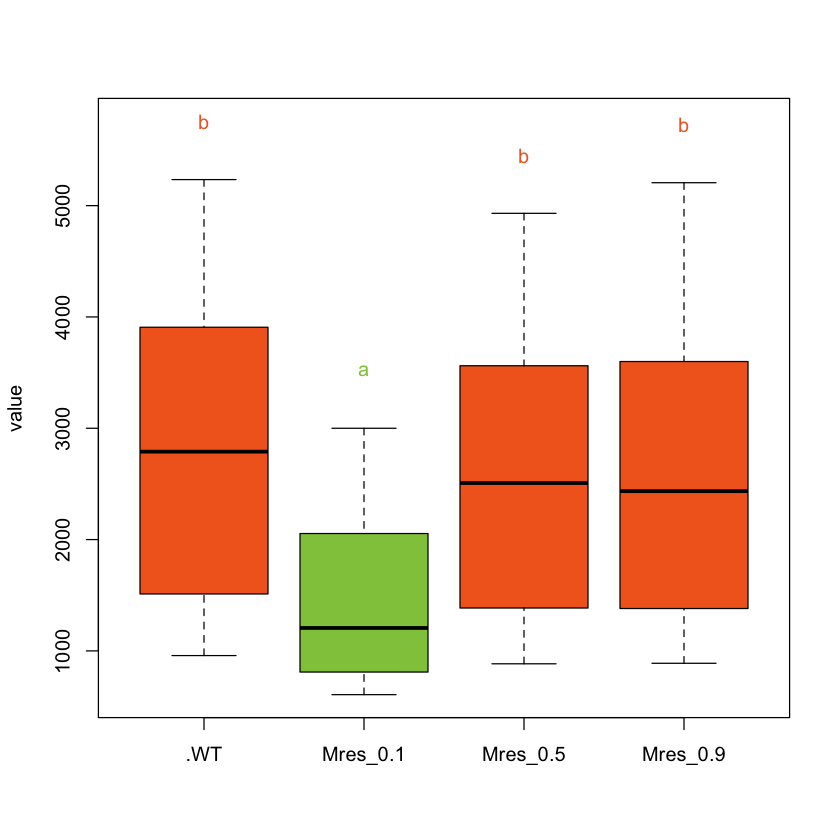

In [40]:
library(ggplot2)
#install.packages("ggthemes")
library(ggthemes)

#plot(muti_comparison , las=1 , col="brown" )
TUKEY <- muti_comparison
#install.packages("multcompView")
library(multcompView)
# I need to group the treatments that are not different each other together.
generate_label_df <- function(TUKEY, variable){
  
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- TUKEY[[variable]][,4]
  Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])

  ## value -> data; treatment -> params
  
  Tukey.labels$params=rownames(Tukey.labels)
  Tukey.labels=Tukey.labels[order(Tukey.labels$params) , ]
  return(Tukey.labels)
}

# Apply the function on my dataset
LABELS=generate_label_df(TUKEY , "df$params")

#value <- data_f
treatment <- params

# A panel of colors to draw each group with the same color :
my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255), rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) , rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),rgb(165,103,40,maxColorValue = 255))
a=boxplot(df$data ~ df$params , ylim=c(min(df$data) , 1.1*max(df$data)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="value" , main="")

# Lets you write the letter over each box. Over is how high you want to write it.
over=0.1*max( a$stats[nrow(a$stats),] )

#Add the labels
text( c(1:nlevels(df$params)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
#
